# 2023-08-28 6 - Results Multimodel Statinformed.ipynb
Results of fitting constrained models with $\epsilon$ based on the quartiles of ERM error aka statinformed models.(the 5-epoch ones, see notebook 5).

## Fetching runs

In [22]:
import wandb
from math import isnan 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import wandb
from tqdm import tqdm
# from cycler import cycler
import matplotlib as mpl
from IPython.display import Markdown, display
    
api = wandb.Api()
project = "Autoformer"
workspace = "alelab"

sweeps = [
    # Constrained sweeps
    "fp5rn5h0",
    "8kexcoui",
    "1az5bvhg",
    "viiqubln",
    # ERM baseline
    "fi1lnhc1",
]

runs = api.runs(f"{workspace}/{project}")
all_runs = []
for run in tqdm(runs):
    if run.State=="finished":
        #for split in ["train", "test","val"]:
        for split in ["train", "test"]:
            #for metric in ["mse",]:
            for metric in ["loss",]: #had to change in this plot because I messed up. The 'loss' name is incorrect (it's not the lagrange-added loss.)
                pred_len = run.config["pred_len"]
                metrics = np.zeros(pred_len)
                #if run.sweep.id in ["tkol4t1r","c7xaz5e8"]:
                if run.sweep.id in sweeps:
                    for i in range(pred_len):
                        run_dict = {**run.config}
                        #run_dict["constraint_level"] = constraint_level
                        #run_dict[f"{metric}"] = run.summary[f"{metric}/{split}/{i}"]
                        run_dict[f"{metric}"] = run.summary.get(f"{metric}/{split}/{i}",run.summary.get(f"mse/{split}/{i}",np.nan)) #god forgive me for this line
                        run_dict["step"]=i
                        run_dict["split"] = split
                        run_dict["run_id"] = run.id
                        # Get either Constrained/ or ERM/ from the run name, then append model name.
                        #print("run.name", run.name)
                        #debug if ERM run
                        run_dict["Algorithm"] = f"{run.name.split('/')[0]} {run.config['model']}"
                        run_dict["sweep_id"] = run.sweep.id
                        #print("Algorithm", run_dict["Algorithm"])
                        all_runs.append(run_dict)

df = pd.DataFrame(all_runs)

100%|██████████| 266/266 [00:17<00:00, 15.00it/s]


In [8]:
df[['run_id',"sweep_id",'Algorithm','model','constraint_level','pred_len']].drop_duplicates().sort_values(['sweep_id','model',"pred_len","constraint_level"])

,run_id,sweep_id,Algorithm,model,constraint_level,pred_len
10224,uaimpeup,1az5bvhg,StatInformed-10e Autoformer,Autoformer,0.682,336
8208,b48hec8w,1az5bvhg,StatInformed-10e Autoformer,Autoformer,0.741,336
6192,xm2kktah,1az5bvhg,StatInformed-10e Autoformer,Autoformer,0.970,336
9216,fe29o3il,1az5bvhg,StatInformed-10e Reformer,Reformer,0.682,336
7200,749ywu49,1az5bvhg,StatInformed-10e Reformer,Reformer,0.741,336
5184,chbkcq99,1az5bvhg,StatInformed-10e Reformer,Reformer,0.970,336
4608,6riqdfsi,8kexcoui,StatInformed-10e Autoformer,Autoformer,0.553,192
3456,4uwwn64k,8kexcoui,StatInformed-10e Autoformer,Autoformer,0.567,192
2304,tv51dihb,8kexcoui,StatInformed-10e Autoformer,Autoformer,0.665,192
4032,mitm69y2,8kexcoui,StatInformed-10e Reformer,Reformer,0.553,192


# Plots

In [26]:
df.groupby(["pred_len","constraint_level"])
#TODO aqui quede, do a groupby so that you have ERM & constrained series for each pred len and constraint level.
# Challenge is that constraint_level is different for ERM (-1). 
# basically you need to propagate ERM to the others I guess.
# Do two group bys?

### Reformer pred_len: 96 constraint_level: 0.5

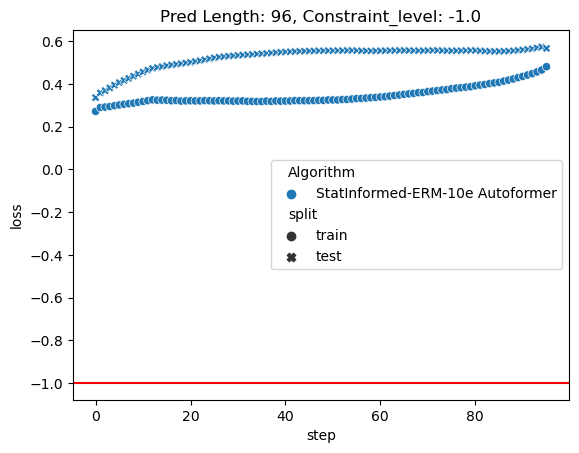

### Reformer pred_len: 96 constraint_level: 0.5

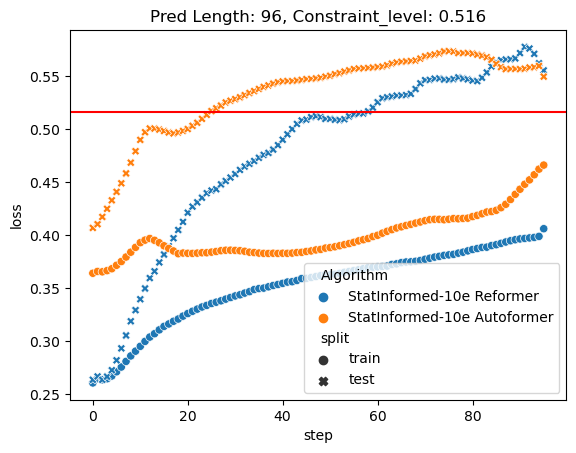

### Reformer pred_len: 96 constraint_level: 0.5

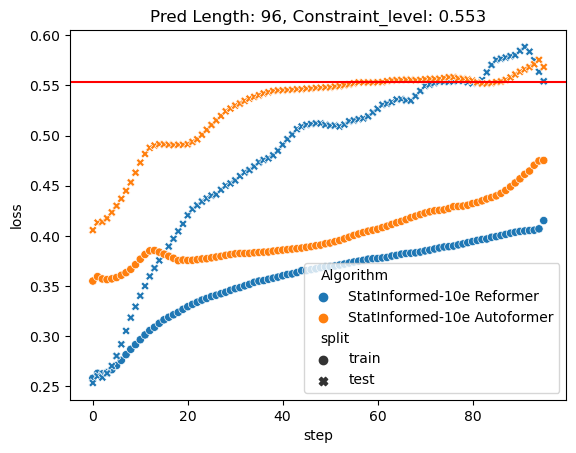

### Reformer pred_len: 96 constraint_level: 0.5

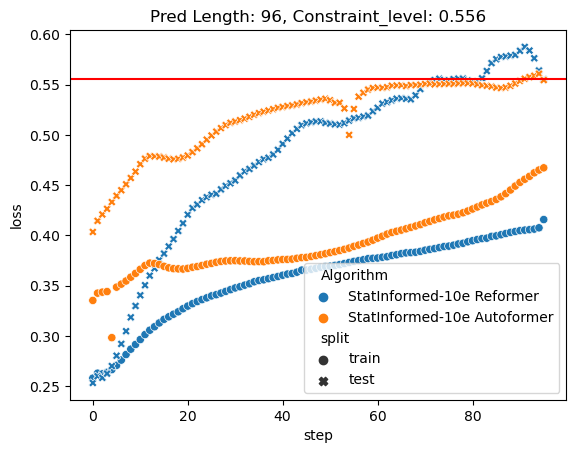

### Reformer pred_len: 192 constraint_level: 0.5

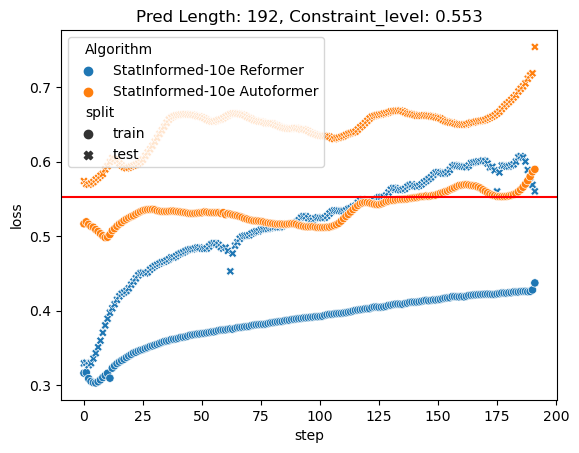

### Reformer pred_len: 192 constraint_level: 0.5

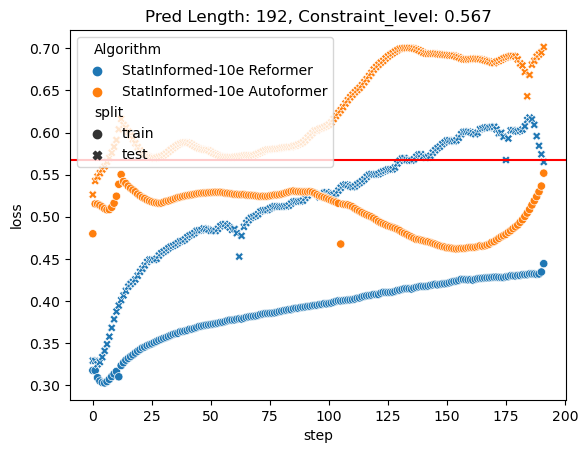

### Reformer pred_len: 192 constraint_level: 0.5

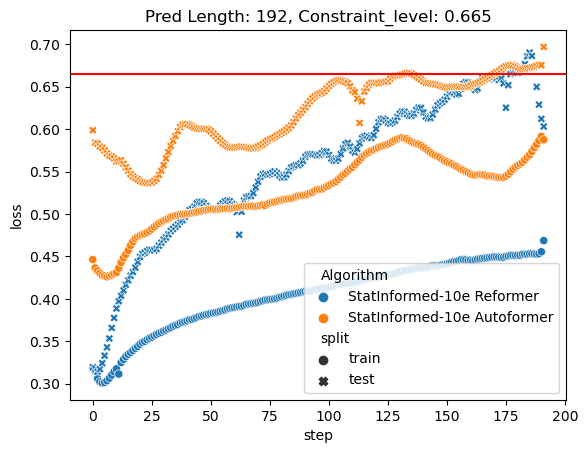

### Reformer pred_len: 336 constraint_level: 0.5

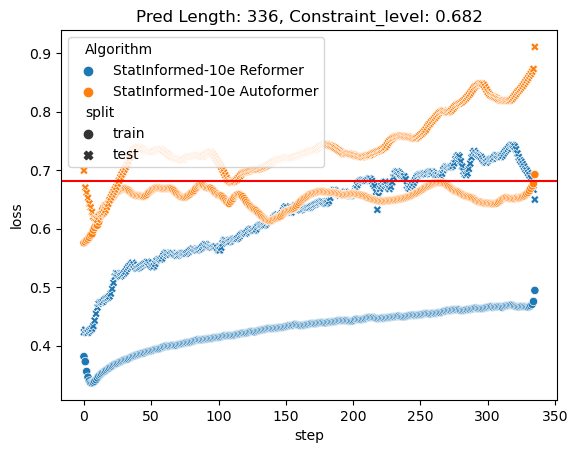

### Reformer pred_len: 336 constraint_level: 0.5

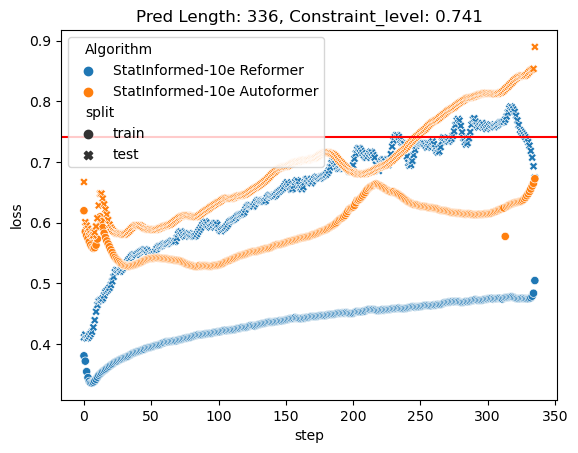

### Reformer pred_len: 336 constraint_level: 0.5

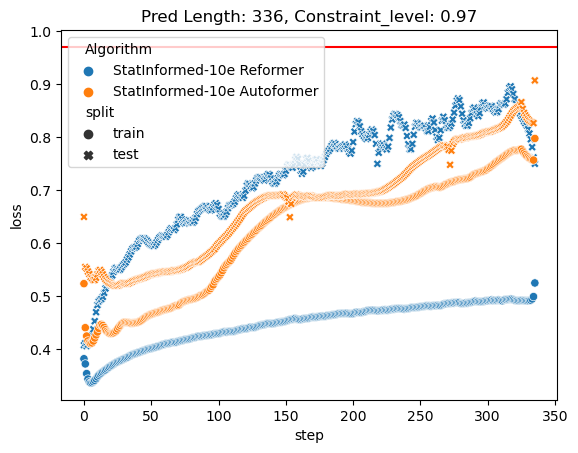

### Reformer pred_len: 720 constraint_level: 0.5

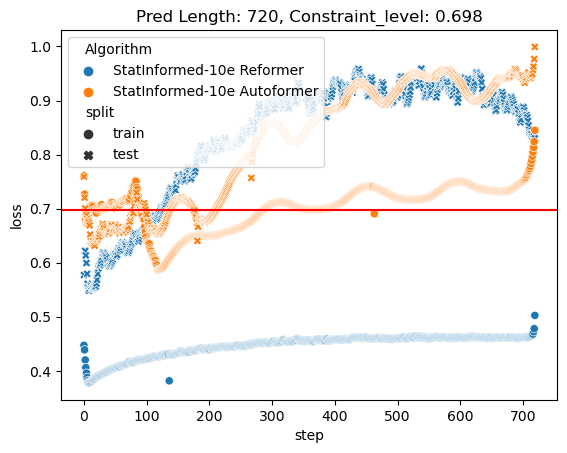

### Reformer pred_len: 720 constraint_level: 0.5

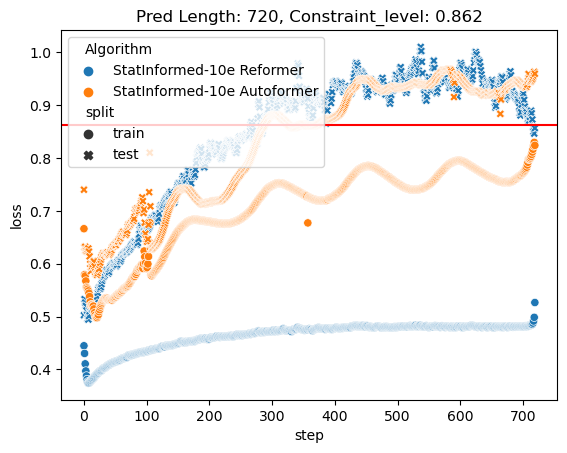

### Reformer pred_len: 720 constraint_level: 0.5

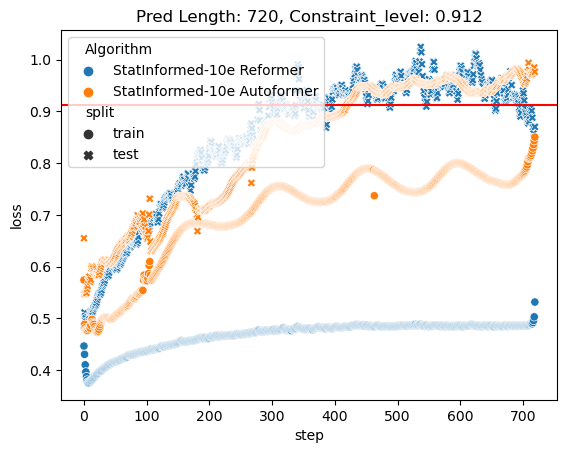

In [27]:
for (pred_len,constraint_level), series in df.groupby(["pred_len","constraint_level"]):
    display(Markdown(f"### {model} pred_len: {pred_len} constraint_level: {constraint_level_to_plot}"))
    plot_series = series
    sns.scatterplot(x="step", y="loss", hue="Algorithm",style="split", data=plot_series)
    plt.axhline(y=constraint_level, color='r', linestyle='-')
    plt.title(f"Pred Length: {pred_len}, Constraint_level: {constraint_level}")
    plt.show()